In [1]:
import numpy as np
from scipy.sparse import load_npz
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import os

PROCESSED_DIR = "../data/processed/text_data/"
HYBRID_DIR = "../data/processed/hybrid"
X_TRAIN_PATH = os.path.join(PROCESSED_DIR, "X_train.npz")
X_TEST_PATH = os.path.join(PROCESSED_DIR, "X_test.npz")
Y_TRAIN_PATH = os.path.join(PROCESSED_DIR, "y_train.npy")
Y_TEST_PATH = os.path.join(PROCESSED_DIR, "y_test.npy")

In [2]:
print("Eğitim ve test verileri yükleniyor...")
X_train = load_npz(X_TRAIN_PATH)
X_test = load_npz(X_TEST_PATH)
y_train = np.load(Y_TRAIN_PATH)
y_test = np.load(Y_TEST_PATH)

Eğitim ve test verileri yükleniyor...


In [ ]:
log_reg_model = LogisticRegression(solver="saga", max_iter=1000, random_state=0)
print("model oluşturuldu")
log_reg_model.fit(X_train, y_train)
print("model eğitildi")
y_pred = log_reg_model.predict(X_test) 

model oluşturuldu
model eğitildi


In [4]:
print("tahmin yapıldı")
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Gerçek (0)', 'Spam (1)']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

tahmin yapıldı

Accuracy: 0.9187

Classification Report:
              precision    recall  f1-score   support

  Gerçek (0)       0.85      0.76      0.81   1122587
    Spam (1)       0.93      0.96      0.95   3930058

    accuracy                           0.92   5052645
   macro avg       0.89      0.86      0.88   5052645
weighted avg       0.92      0.92      0.92   5052645


Confusion Matrix:


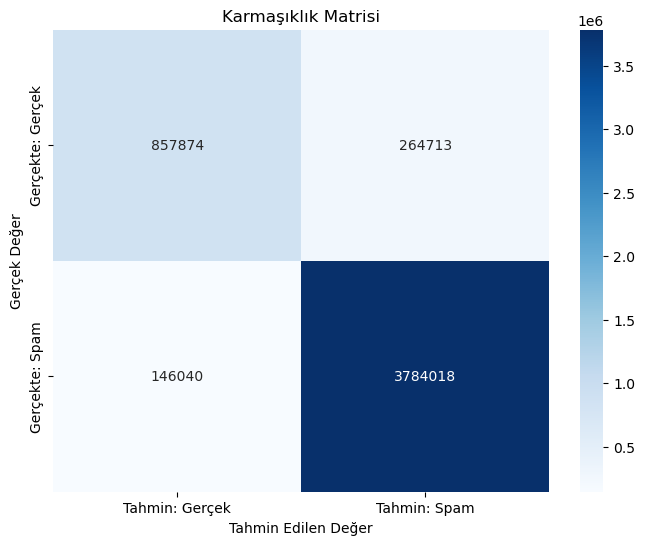

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
  xticklabels=['Tahmin: Gerçek', 'Tahmin: Spam'], 
  yticklabels=['Gerçekte: Gerçek', 'Gerçekte: Spam'])

plt.ylabel('Gerçek Değer')
plt.xlabel('Tahmin Edilen Değer')
plt.title('Karmaşıklık Matrisi')
plt.show()


In [6]:
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]
threshold = 0.70

new_pred = (y_pred_proba >= threshold).astype(int)
print("tahmin yapıldı")
accuracy = accuracy_score(y_test, new_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, new_pred, target_names=['Gerçek (0)', 'Spam (1)']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, new_pred)

tahmin yapıldı

Accuracy: 0.9092

Classification Report:
              precision    recall  f1-score   support

  Gerçek (0)       0.76      0.86      0.81   1122587
    Spam (1)       0.96      0.92      0.94   3930058

    accuracy                           0.91   5052645
   macro avg       0.86      0.89      0.87   5052645
weighted avg       0.91      0.91      0.91   5052645


Confusion Matrix:


In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
  xticklabels=['Tahmin: Gerçek', 'Tahmin: Spam'], 
  yticklabels=['Gerçekte: Gerçek', 'Gerçekte: Spam'])

plt.ylabel('Gerçek Değer')
plt.xlabel('Tahmin Edilen Değer')
plt.title('Karmaşıklık Matrisi')
plt.show()

In [7]:
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]
threshold = 0.71

new_pred = (y_pred_proba >= threshold).astype(int)
print("tahmin yapıldı")
accuracy = accuracy_score(y_test, new_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, new_pred, target_names=['Gerçek (0)', 'Spam (1)']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, new_pred)

tahmin yapıldı

Accuracy: 0.9078

Classification Report:
              precision    recall  f1-score   support

  Gerçek (0)       0.76      0.86      0.81   1122587
    Spam (1)       0.96      0.92      0.94   3930058

    accuracy                           0.91   5052645
   macro avg       0.86      0.89      0.87   5052645
weighted avg       0.91      0.91      0.91   5052645


Confusion Matrix:


In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
  xticklabels=['Tahmin: Gerçek', 'Tahmin: Spam'], 
  yticklabels=['Gerçekte: Gerçek', 'Gerçekte: Spam'])

plt.ylabel('Gerçek Değer')
plt.xlabel('Tahmin Edilen Değer')
plt.title('Karmaşıklık Matrisi')
plt.show()

# Model 70 - 75 thresholdlarında aynı sonucu veriyor. Maximum değer 0.71de

In [ ]:
log_reg_model_with_more_penalty = LogisticRegression(solver="saga", max_iter=1000, random_state=0, class_weight={0:1,1:1.5})
print("model yeni ceza parametreleri ile yeniden oluşturuldu")
log_reg_model_with_more_penalty.fit(X_train, y_train)
print("model eğitildi")
y_pred = log_reg_model_with_more_penalty.predict(X_test)

In [ ]:
print("tahmin yapıldı")
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Gerçek (0)', 'Spam (1)']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
  xticklabels=['Tahmin: Gerçek', 'Tahmin: Spam'], 
  yticklabels=['Gerçekte: Gerçek', 'Gerçekte: Spam'])

plt.ylabel('Gerçek Değer')
plt.xlabel('Tahmin Edilen Değer')
plt.title('Karmaşıklık Matrisi')
plt.show()

In [ ]:
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]
threshold = 0.71

new_pred = (y_pred_proba >= threshold).astype(int)
print("tahmin yapıldı")
accuracy = accuracy_score(y_test, new_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, new_pred, target_names=['Gerçek (0)', 'Spam (1)']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, new_pred)

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
  xticklabels=['Tahmin: Gerçek', 'Tahmin: Spam'], 
  yticklabels=['Gerçekte: Gerçek', 'Gerçekte: Spam'])

plt.ylabel('Gerçek Değer')
plt.xlabel('Tahmin Edilen Değer')
plt.title('Karmaşıklık Matrisi')
plt.show()

In [3]:
CELL_PHONES_ACCESSORIES = os.path.join(HYBRID_DIR, "Cell_Phones_and_Accessories")
CLOTHING_SHOES_JEWELRY = os.path.join(HYBRID_DIR, "Clothing_Shoes_and_Jewelry")
ELECTRONICS = os.path.join(HYBRID_DIR, "Electronics")
HOME_KITCHEN = os.path.join(HYBRID_DIR, "Home_and_Kitchen")
SPORTS_OUTDOORS = os.path.join(HYBRID_DIR, "Sports_and_Outdoors")
TOYS_GAMES = os.path.join(HYBRID_DIR, "Toys_and_Games")

In [5]:
X_train_electronic = load_npz(os.path.join(ELECTRONICS, "X_train.npz"))
X_test_electronic = load_npz(os.path.join(ELECTRONICS, "X_test.npz"))
y_train_electronic = np.load(os.path.join(ELECTRONICS, "y_train.npy"))
y_test_electronic = np.load(os.path.join(ELECTRONICS, "y_test.npy"))

1367170


In [17]:
non_spams = np.sum(y_train_electronic == 0)
spams = np.sum(y_train_electronic == 1)
scale_pos_weight_value = non_spams / spams
print(spams)
print(non_spams)

4313456
1367170


In [3]:
import lightgbm as lgb

In [18]:
import lightgbm as lgb

# Modeli oluştur (n_jobs=-1 tüm çekirdekleri kullanır)
lgbm_model = lgb.LGBMClassifier(random_state=42, n_jobs=8, class_weight="balanced")

print("LightGBM modeli eğitiliyor...")
lgbm_model.fit(X_train_electronic, y_train_electronic)
print("✅ Model çok daha hızlı eğitildi!")

LightGBM modeli eğitiliyor...
[LightGBM] [Info] Number of positive: 4313456, number of negative: 1367170
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 117.953532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2457886
[LightGBM] [Info] Number of data points in the train set: 5680626, number of used features: 20001
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
✅ Model çok daha hızlı eğitildi!


In [19]:
y_pred_electronic = lgbm_model.predict(X_test_electronic)
print("tahmin yapıldı")
accuracy = accuracy_score(y_test_electronic, y_pred_electronic)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_electronic, y_pred_electronic, target_names=['Gerçek (0)', 'Spam (1)']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_electronic, y_pred_electronic)

c:\Users\Aybars\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


tahmin yapıldı

Accuracy: 0.4208

Classification Report:
              precision    recall  f1-score   support

  Gerçek (0)       0.26      0.76      0.39    455724
    Spam (1)       0.80      0.31      0.45   1437819

    accuracy                           0.42   1893543
   macro avg       0.53      0.54      0.42   1893543
weighted avg       0.67      0.42      0.44   1893543


Confusion Matrix:


In [14]:
import pandas as pd
feature_names = ['overall', 'helpfulness_ratio', 'text_length', 'reviewer_review_count']
importance_df = pd.DataFrame({
    'feature': lgbm_model.booster_.feature_name(),
    'importance': lgbm_model.feature_importances_
}).sort_values('importance', ascending=False)

print("En Önemli Özellikler:")
print(importance_df.head(10))


En Önemli Özellikler:
            feature  importance
10789  Column_10789          58
2679    Column_2679          42
6529    Column_6529          36
12004  Column_12004          35
5153    Column_5153          32
12343  Column_12343          31
1895    Column_1895          29
2302    Column_2302          29
11251  Column_11251          28
6388    Column_6388          27


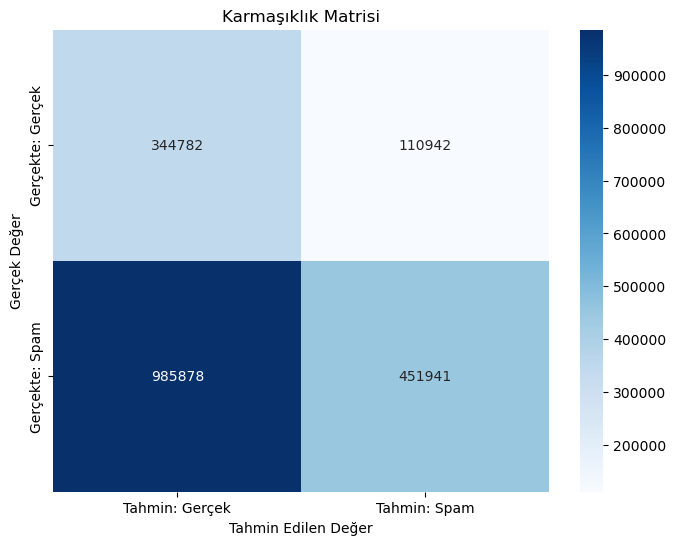

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
  xticklabels=['Tahmin: Gerçek', 'Tahmin: Spam'], 
  yticklabels=['Gerçekte: Gerçek', 'Gerçekte: Spam'])

plt.ylabel('Gerçek Değer')
plt.xlabel('Tahmin Edilen Değer')
plt.title('Karmaşıklık Matrisi')
plt.show()

In [4]:
X_train_toys = load_npz(os.path.join(TOYS_GAMES, "X_train.npz"))
X_test_toys = load_npz(os.path.join(TOYS_GAMES, "X_test.npz"))
y_train_toys = np.load(os.path.join(TOYS_GAMES, "y_train.npy"))
y_test_toys = np.load(os.path.join(TOYS_GAMES, "y_test.npy"))

In [5]:
lgbm_model = lgb.LGBMClassifier(random_state=42, n_jobs=-1)

print("LightGBM modeli eğitiliyor...")
lgbm_model.fit(X_train_toys, y_train_toys)
print("✅ Model çok daha hızlı eğitildi!")

LightGBM modeli eğitiliyor...
[LightGBM] [Info] Number of positive: 1247066, number of negative: 250789
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 29.509392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2099039
[LightGBM] [Info] Number of data points in the train set: 1497855, number of used features: 20001
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.832568 -> initscore=1.603937
[LightGBM] [Info] Start training from score 1.603937
✅ Model çok daha hızlı eğitildi!


In [6]:
y_pred_toys = lgbm_model.predict(X_test_toys)
print("tahmin yapıldı")
accuracy = accuracy_score(y_test_toys, y_pred_toys)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_toys, y_pred_toys, target_names=['Gerçek (0)', 'Spam (1)']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_toys, y_pred_toys)

c:\Users\Aybars\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


tahmin yapıldı

Accuracy: 0.9210

Classification Report:
              precision    recall  f1-score   support

  Gerçek (0)       0.84      0.66      0.74     83597
    Spam (1)       0.93      0.97      0.95    415688

    accuracy                           0.92    499285
   macro avg       0.89      0.81      0.84    499285
weighted avg       0.92      0.92      0.92    499285


Confusion Matrix:


In [26]:
import pandas as pd
feature_names = ['overall', 'helpfulness_ratio', 'text_length', 'reviewer_review_count']
importance_df = pd.DataFrame({
    'feature': lgbm_model.booster_.feature_name(),
    'importance': lgbm_model.feature_importances_
}).sort_values('importance', ascending=False)

print("En Önemli Özellikler:")
print(importance_df.head(10))


En Önemli Özellikler:
            feature  importance
6737    Column_6737          51
10976  Column_10976          45
9830    Column_9830          42
12263  Column_12263          36
9869    Column_9869          33
2744    Column_2744          32
1824    Column_1824          31
6093    Column_6093          29
4414    Column_4414          29
6562    Column_6562          29


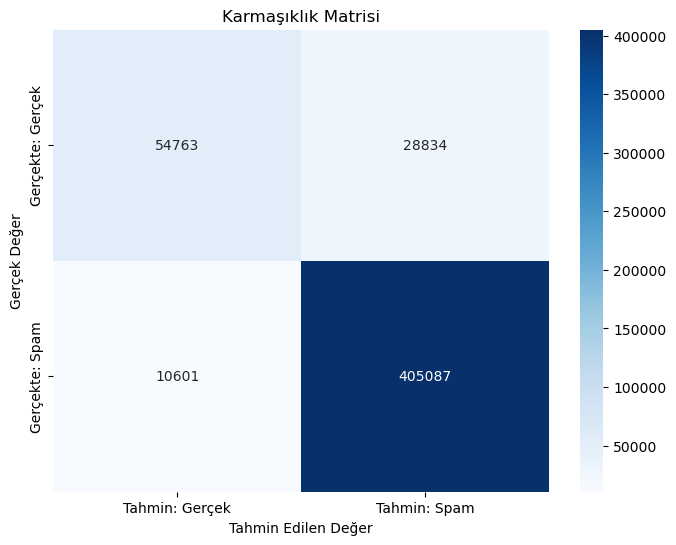

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
  xticklabels=['Tahmin: Gerçek', 'Tahmin: Spam'], 
  yticklabels=['Gerçekte: Gerçek', 'Gerçekte: Spam'])

plt.ylabel('Gerçek Değer')
plt.xlabel('Tahmin Edilen Değer')
plt.title('Karmaşıklık Matrisi')
plt.show()

In [ ]:
model = LogisticRegression(solver="saga", max_iter=1000, random_state=0)
model.fit(X_train_toys, y_train_toys)


In [ ]:
y_pred_toys = model.predict(X_test_toys)
print("tahmin yapıldı")
accuracy = accuracy_score(y_test_toys, y_pred_toys)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_toys, y_pred_toys, target_names=['Gerçek (0)', 'Spam (1)']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_toys, y_pred_toys)

tahmin yapıldı

Accuracy: 0.8479

Classification Report:
              precision    recall  f1-score   support

  Gerçek (0)       0.00      0.00      0.00      7606
    Spam (1)       0.85      1.00      0.92     42394

    accuracy                           0.85     50000
   macro avg       0.42      0.50      0.46     50000
weighted avg       0.72      0.85      0.78     50000


Confusion Matrix:


c:\Users\Aybars\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Aybars\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Aybars\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


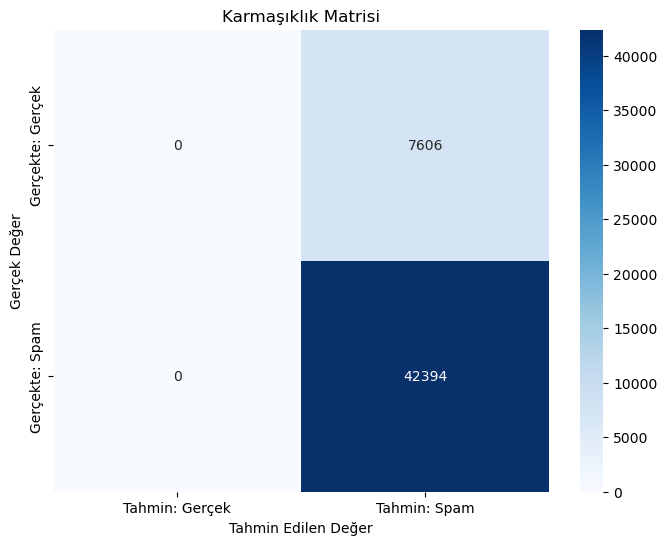

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
  xticklabels=['Tahmin: Gerçek', 'Tahmin: Spam'], 
  yticklabels=['Gerçekte: Gerçek', 'Gerçekte: Spam'])

plt.ylabel('Gerçek Değer')
plt.xlabel('Tahmin Edilen Değer')
plt.title('Karmaşıklık Matrisi')
plt.show()

In [1]:
import pandas as pd

data = {
    'x1': ['Rain', 'Rain', 'Rain', 'Rain', 'Rain', 'Rain', 'No Rain', 'No Rain', 'No Rain', 'No Rain', 'No Rain', 'No Rain', 'No Rain', 'No Rain', 'No Rain', 'No Rain'],
    'x2': ['Before', 'During', 'During', 'After', 'After', 'After', 'Before', 'Before', 'Before', 'During', 'During', 'After', 'After', 'After', 'After', 'After'],
    'x3': ['Both', 'Both', 'Both', 'Backpack', 'Backpack', 'Lunchbox', 'Backpack', 'Lunchbox', 'Lunchbox', 'Backpack', 'Both', 'Backpack', 'Backpack', 'Both', 'Both', 'Lunchbox'],
    'x4': ['Tired', 'Not Tired', 'Tired', 'Not Tired', 'Tired', 'Tired', 'Tired', 'Not Tired', 'Tired', 'Not Tired', 'Tired', 'Not Tired', 'Tired', 'Not Tired', 'Tired', 'Not Tired'],
    'y': ['Drive', 'Bus', 'Drive', 'Bus', 'Bus', 'Drive', 'Bike', 'Bus', 'Drive', 'Bus', 'Drive', 'Bike', 'Bike', 'Bus', 'Drive', 'Bus']
}
df = pd.DataFrame(data)

print(df)

         x1      x2        x3         x4      y
0      Rain  Before      Both      Tired  Drive
1      Rain  During      Both  Not Tired    Bus
2      Rain  During      Both      Tired  Drive
3      Rain   After  Backpack  Not Tired    Bus
4      Rain   After  Backpack      Tired    Bus
5      Rain   After  Lunchbox      Tired  Drive
6   No Rain  Before  Backpack      Tired   Bike
7   No Rain  Before  Lunchbox  Not Tired    Bus
8   No Rain  Before  Lunchbox      Tired  Drive
9   No Rain  During  Backpack  Not Tired    Bus
10  No Rain  During      Both      Tired  Drive
11  No Rain   After  Backpack  Not Tired   Bike
12  No Rain   After  Backpack      Tired   Bike
13  No Rain   After      Both  Not Tired    Bus
14  No Rain   After      Both      Tired  Drive
15  No Rain   After  Lunchbox  Not Tired    Bus


In [31]:
import numpy as np
import math
X = df.iloc[:, 0:4]
y = df.iloc[:, 4]
y

0     Drive
1       Bus
2     Drive
3       Bus
4       Bus
5     Drive
6      Bike
7       Bus
8     Drive
9       Bus
10    Drive
11     Bike
12     Bike
13      Bus
14    Drive
15      Bus
Name: y, dtype: object

In [32]:
bike_count = np.sum(y.values == "Bike")
bus_count = np.sum(y.values == "Bus")
drive_count = np.sum(y.values == "Drive")

print(f"bike: {bike_count}, bus: {bus_count}, drive:{drive_count}")

bike: 3, bus: 7, drive:6


In [95]:
def entropy(options):
  total = np.sum(options)
  if total == 0:
     return 0.0
  probabilities = options / total
  p_nz = probabilities[probabilities > 0]

  entropy_value = -np.sum(p_nz * np.log2(p_nz))
  return entropy_value

op = [bike_count, bus_count, drive_count]
entropy(op)

np.float64(1.5052408149441479)

In [112]:
## for x1
print(X["x1"].unique())
y_rain = y[X["x1"] == "Rain"]

rain_count = y_rain.value_counts()
options_rain = rain_count.values.tolist()

prob_rain = np.sum(X["x1"] == "Rain") / X["x1"].size

entropy_rain = entropy(options_rain)

x1_entropy = prob_rain * entropy_rain

x1_entropy

['Rain' 'No Rain']


np.float64(0.375)

In [114]:
# print(X["x2"].value_counts())
sum = 0
prob_before = np.sum(X["x2"] == "Before") / X["x2"].size
prob_after = np.sum(X["x2"] == "After") / X["x2"].size
prob_during = np.sum(X["x2"] == "During") / X["x2"].size

y_before = y[X["x2"] == "Before"]
y_before = y_before.value_counts().values.tolist()
y_before_entropy = entropy(y_before)
sum += prob_before * y_before_entropy

sum += prob_after * entropy((y[X["x2"] == "After"].value_counts().values.tolist()))
sum += prob_during * entropy((y[X["x2"] == "During"].value_counts().values.tolist()))

x2_entropy = sum
x2_entropy

np.float64(1.375)

In [126]:
# print(X["x3"].value_counts())
probs_vector = X["x3"].value_counts().values / np.sum(X["x3"].value_counts().values)
probs_vector

y_backpack = y[X["x3"] == "Backpack"].value_counts().values
y_lunchbox = y[X["x3"] == "Lunchbox"].value_counts().values
y_both = y[X["x3"] == "Both"].value_counts().values
entopies = np.array([entropy(y_backpack),entropy(y_lunchbox), entropy(y_both)])

x3_entropy = np.sum(probs_vector * entopies)
x3_entropy

np.float64(0.9795739585136224)